<a href="https://colab.research.google.com/github/GabrielaPuerta/AnalisisAlgoritmos/blob/main/ModeloRegresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/GabrielaPuerta/AnalisisAlgoritmos/main/BaseDeDatos.csv', sep = ",")
df

,temperature,humidity,ph,water availability,season,label
0,20.879744,82.002744,6.502985,202.935536,rainy,rice
1,21.770462,80.319644,7.038096,226.655537,rainy,rice
2,23.004459,82.320763,7.840207,263.964248,rainy,rice
3,26.491096,80.158363,6.980401,242.864034,rainy,rice
4,20.130175,81.604873,7.628473,262.717340,rainy,rice
...,...,...,...,...,...,...
1395,23.874845,86.792613,6.718725,177.514731,rainy,jute
1396,23.928879,88.071123,6.880205,154.660874,rainy,jute
1397,24.814412,81.686889,6.861069,190.788639,rainy,jute
1398,24.447439,82.286484,6.769346,190.968489,rainy,jute


In [ ]:
# Identifica si hay nulos y los tipos de datos que tienen la columna del df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1400 non-null   float64
 1   humidity            1400 non-null   float64
 2   ph                  1400 non-null   float64
 3   water availability  1400 non-null   float64
 4   season              1400 non-null   object 
 5   label               1400 non-null   object 
dtypes: float64(4), object(2)
memory usage: 65.8+ KB
None


In [ ]:
season_types = df['season'].value_counts()
print(season_types)

season
rainy     600
winter    400
summer    300
spring    100
Name: count, dtype: int64


In [ ]:
df["season"] = df["season"].replace(['rainy', 'winter', 'summer',"spring"], [1,2,3,4])

In [ ]:
label_types = df['label'].value_counts()
print(label_types)

label
maize          200
rice           100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
watermelon     100
muskmelon      100
cotton         100
jute           100
Name: count, dtype: int64


In [ ]:
df["label"] = df["label"].replace(['maize', 'rice', 'chickpea',"kidneybeans","pigeonpeas","mothbeans","mungbean","blackgram","lentil","watermelon","muskmelon","cotton","jute"],[1,2,3,4,5,6,7,8,9,10,11,12,13])

In [ ]:
df

,temperature,humidity,ph,water availability,season,label
0,20.879744,82.002744,6.502985,202.935536,1,2
1,21.770462,80.319644,7.038096,226.655537,1,2
2,23.004459,82.320763,7.840207,263.964248,1,2
3,26.491096,80.158363,6.980401,242.864034,1,2
4,20.130175,81.604873,7.628473,262.717340,1,2
...,...,...,...,...,...,...
1395,23.874845,86.792613,6.718725,177.514731,1,13
1396,23.928879,88.071123,6.880205,154.660874,1,13
1397,24.814412,81.686889,6.861069,190.788639,1,13
1398,24.447439,82.286484,6.769346,190.968489,1,13


In [ ]:
X = df.drop('label', axis=1)
y = df['label']

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importances[i]}")


temperature: 0.12942123963262758
humidity: 0.35543573156028174
ph: 0.0565971555365282
water availability: 0.4030181150932495
season: 0.05552775817731294


In [ ]:
df.columns

features = ['temperature', 'humidity', 'ph','water availability','season']
X = df[features]
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
# Crear y entrenar el modelo
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el coeficiente de determinación (R2 score)
r2 = r2_score(y_test, y_pred)

# Calcular el error cuadrático medio (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)


# Mostrar los resultados
print("Resultados del modelo Gradient Boosting Regressor:")
print("----------------------------------------------")
# Evalua el ajuste del modelo de regresión, permite saber que tan buena es la predicción(coeiciente de determinación)
print("R2 score:", r2)
# Que tanto puede fallar el modelo, la diferencia de todos los errores al cuadrado y se suman(Error cuadratico medio)
print("Mean squared error:", mse)


Resultados del modelo Gradient Boosting Regressor:
----------------------------------------------
R2 score: 0.825737174356094
Mean squared error: 2.7390716287929893


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular el Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el Root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mostrar los resultados
# Es igual al mean squared error, pero este no se eleva al cuadrado si no que se toma el valor absoluto de la diferencia para la sumatoria
print("Mean absolute error:", mae)
# Raiz del error cuadratico medio
print("Root mean squared error:", rmse)


Mean absolute error: 0.8577148630501963
Root mean squared error: 1.655014087188683


In [ ]:
# DataFrame con los nuevos datos
new_data = pd.DataFrame({
    'temperature': [24.51588066],
    'humidity': [83.5352163],
    'ph': [6.685346424],
    'water availability': [230.4462359],
    'season': [1]  # Asegúrate de que 'season' sea numérico
})

# Predicción usando el modelo de Gradient Boosting Regressor
predicted_label = model.predict(new_data)

# Redondear el resultado a un número entero
predicted_label_rounded = round(predicted_label[0])

# Mostrando el resultado
print("La predicción para el tipo de planta es:", predicted_label_rounded)

La predicción para el tipo de planta es: 3


In [ ]:
# Diccionario de nombres de plantas
plant_names = {
    1: 'maize',
    2: 'rice',
    3: 'chickpea',
    4: 'kidneybeans',
    5: 'pigeonpeas',
    6: 'mothbeans',
    7: 'mungbean',
    8: 'blackgram',
    9: 'lentil',
    10: 'watermelon',
    11: 'muskmelon',
    12: 'cotton',
    13: 'jute'
}

# Predicción usando el modelo de Gradient Boosting Regressor
predicted_class = round(model.predict(new_data)[0])

# Obtiene el nombre de la planta correspondiente al número de clase
predicted_plant = plant_names.get(predicted_class, 'Desconocida')

# Mostrando el resultado
print("La predicción para el tipo de planta es:", predicted_plant)


La predicción para el tipo de planta es: chickpea


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
train_r2 = model.score(X_train, y_train)
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)

print("Training performance:")
print(f"R2 score: {train_r2}")
print(f"Mean squared error: {train_mse}")
print(f"Mean absolute error: {train_mae}")

# Evaluar el rendimiento del modelo en el conjunto de prueba
test_r2 = model.score(X_test, y_test)
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("\nTest performance:")
print(f"R2 score: {test_r2}")
print(f"Mean squared error: {test_mse}")
print(f"Mean absolute error: {test_mae}")


Training performance:
R2 score: 0.3479869856708643
Mean squared error: 9.958655168875335
Mean absolute error: 2.427338085404328

Test performance:
R2 score: 0.3746852179908742
Mean squared error: 9.828728371282235
Mean absolute error: 2.382087202924178


In [ ]:
# prompt: hazme el modelo de regresión polinomial para mis datos

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

print("R2 score:", r2_score(y, y_pred))
print("Mean squared error:", mean_squared_error(y, y_pred))


R2 score: 0.49425927657186797
Mean squared error: 7.782214397241053


In [ ]:
LM = LinearRegression()

LM.fit(X_train, y_train)

y_pred = LM.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"El coeficiente determinación es: {r2}")

#Calculo el error cuadratico medio
mse = mean_squared_error(y_test, y_pred)
print('La raiz del error cuadratico medio es:', np.sqrt(mse))

El coeficiente determinación es: 0.3746852179908742
La raiz del error cuadratico medio es: 3.135080281473225


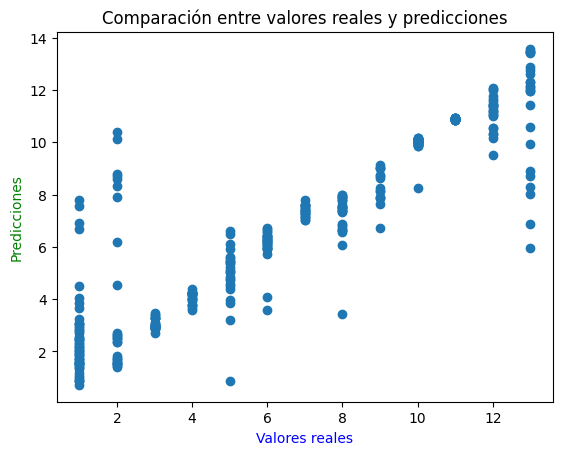

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que ya tienes entrenado tu modelo y tienes las predicciones y valores reales
# y_pred y y_test son los valores predichos y reales respectivamente

# Graficar valores predichos vs valores reales
plt.scatter(y_test, y_pred)

# Asignar colores diferentes a los ejes x e y
plt.xlabel("Valores reales", color='blue')
plt.ylabel("Predicciones", color='green')

plt.title("Comparación entre valores reales y predicciones")
plt.show()
